In [1]:
#IPython extension to reload modules before executing user code. If we make any change in function 
# and imoprting it we don't need to restart if we use auto reload 
%load_ext autoreload

# to print in between values as well without print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


# sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing


# scipy
from scipy.stats import boxcox

# DATA Pre Processing

BASIC PREPROCESSING BEFORE EDA

1. Check for Data/Data Types and Bad Data
2. Check Columns Names
3. Check for data Imbalance  
4. Divide in train and test based on data imbalance 
5. Check for Missing Values
6. Imputation of missing values
7. Checks and remove outliers
8. Perform new feature imputation if needed
9. Check for distribution type and Perform necessary transformations if needed


**EDA**

**Save for training**
1.  Scaling the data
2.  Binning Continuous data if needed


**Training and Feature selection**

1. Feature selection


basic preprocessing link - https://towardsdatascience.com/a-checklist-for-data-pre-processing-before-you-build-your-machine-learning-model-91d2d04dc53f 

In [3]:
# load database
data = pd.read_csv('Data/MOD_xAPI-Edu-Data.csv')
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40.0,50,12,50,No,Bad,Above-7,M


## 1. checking data and types
Data types are one of those things that you don’t tend to care about until you get an error or some unexpected results. It is also one of the first things you should check once you load a new data into pandas for further analysis. We need to be sure if pandas has loaded all the types correctly

link - https://pbpython.com/pandas_dtypes.html

In [4]:
data.dtypes

gender                       object
NationalITy                  object
PlaceofBirth                 object
StageID                      object
GradeID                      object
SectionID                    object
Topic                        object
Semester                     object
Relation                     object
raisedhands                 float64
VisITedResources              int64
AnnouncementsView             int64
Discussion                    int64
ParentAnsweringSurvey        object
ParentschoolSatisfaction     object
StudentAbsenceDays           object
Class                        object
dtype: object

In [5]:
# T will represent the transpose of the resulting dataframe, better for visualization
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,481,2,M,306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NationalITy,481,14,KW,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PlaceofBirth,481,14,KuwaIT,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StageID,481,3,MiddleSchool,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GradeID,481,10,G-02,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SectionID,481,3,A,284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Topic,479,12,IT,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Semester,481,2,F,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relation,481,2,Father,284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
raisedhands,478.0,NaN,NaN,NaN,46.853556,30.774957,0.0,16.0,50.0,75.0,100.0


In [6]:
# data.describe(include='number').T

In [7]:
# data.describe()

In [8]:
# checking if categorical variables are correct or not else replacing with np.nan
# saving categories for later use/ one hot encoding
# cat_dict = {}
# cat_cols = data.select_dtypes(include=["O"]).columns.tolist()
# for col in cat_cols:
#     print(col)
#     cat_dict[col] = data[col].unique().tolist()
#     print(data[col].unique())
#     print()

### According to basic analysis the data looks correct, imported types are correct by pandas

### Extra similar functions

In [9]:
# 1. if we only need to showcase few columns only
data[['gender','raisedhands']].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,481,2,M,306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
raisedhands,478.0,NaN,NaN,NaN,46.853556,30.774957,0.0,16.0,50.0,75.0,100.0


In [10]:
# 2. if you want to select only the categorical columns, use the select_dtypes function
cat_cols = data.select_dtypes(include=["object", "category"]).columns.tolist()
cat_cols

['gender',
 'NationalITy',
 'PlaceofBirth',
 'StageID',
 'GradeID',
 'SectionID',
 'Topic',
 'Semester',
 'Relation',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction',
 'StudentAbsenceDays',
 'Class']

In [11]:
# 3. to select numerical columns only
num_cols = data.select_dtypes(include=["number"]).columns.tolist()
num_cols 

['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

## 2. Check column names

it is always better to deal with column names without spaces

In [12]:
data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [13]:
# this is inplace, the column names will get changed
data.columns =[col.replace(' ','_') for col in data.columns]

In [14]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40.0,50,12,50,No,Bad,Above-7,M


## 3. Divide dataset in train and test

We will be only working with the train dataset, the test dataset will be unknokn till the end, the same senerio which we get in real life

Although the problem - 
1. what if few categories are missed in test dataset, we will be having no one hot encoding for new category, how to tackle that

Possible Solutions - 
1. when making one hot encoding for categorical variable use both train,test (all information available)
2. When new category arrives retraining of model

M    211
H    142
L    128
Name: Class, dtype: int64

<AxesSubplot:>

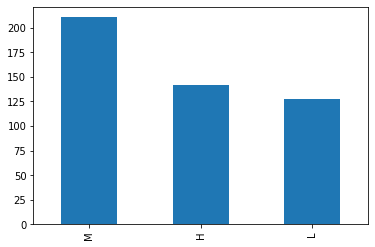

In [15]:
data.Class.value_counts()
data.Class.value_counts().plot(kind = 'bar')

#### Data is not imbalanced but it is always good to have stratified split

In [16]:
# random state help to reproduce the same results and stratified split takes care of dividing the data into the same proportion of each class in train and test
train, test = train_test_split(data, test_size=0.2, shuffle= True, random_state=0, stratify=data['Class'])

In [17]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,384,2,M,244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NationalITy,384,14,KW,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PlaceofBirth,384,14,KuwaIT,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StageID,384,3,MiddleSchool,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GradeID,384,10,G-02,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SectionID,384,3,A,229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Topic,382,12,IT,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Semester,384,2,F,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relation,384,2,Father,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
raisedhands,381.0,NaN,NaN,NaN,47.141732,31.103661,0.0,15.0,50.0,77.0,100.0


In [18]:
test.to_csv('Data/test.csv',index=False)

In [19]:
# train = train.reset_index(drop=True)
# test = test.reset_index(drop=True)

In [20]:
# divide in xtrain,xtest, ytrain,ytest, ytrain and ytest we will directly use at the end, from here we will only deal with x_train,x_test  
# data[data.columns.drop('Class')]
# data.loc[:, data.columns.drop('Class')]
# data[[i for i in list(data.columns) if i not in ['Class']]]
# x_train = train[train.columns[~train.columns.isin(['Class'])]]
# x_test  = test[test.columns[~test.columns.isin(['Class'])]]
# y_train = train['Class']
# y_test = test['Class']

In [21]:
# num_cols = train.select_dtypes(include=["O"]).columns.tolist()
# num_cols 

## 4. check for missing values

In [22]:
# a basic first step is to check if any data is missing in predicted value, because if some lable in not there in y_train, there is no point to include that row  
train['Class'].isnull().any()

False

In [23]:
# check the missing values columns
train.isnull().any()

gender                      False
NationalITy                 False
PlaceofBirth                False
StageID                     False
GradeID                     False
SectionID                   False
Topic                        True
Semester                    False
Relation                    False
raisedhands                  True
VisITedResources            False
AnnouncementsView           False
Discussion                  False
ParentAnsweringSurvey       False
ParentschoolSatisfaction    False
StudentAbsenceDays          False
Class                       False
dtype: bool

In [24]:
# get the missing columns
null_series = train.isnull().any()
null_cols = list(null_series[null_series==True].index)
null_cols

['Topic', 'raisedhands']

In [25]:
# count missing values
train[null_cols].isnull().sum()

Topic          2
raisedhands    3
dtype: int64

### Extra

#### handling series
we usually get return object in pandas series object, like above for null values
1. https://www.geeksforgeeks.org/python-pandas-series/ 
2. https://stackoverflow.com/questions/31593201/how-are-iloc-and-loc-different

## 5. Compute Missing values

There are multiple ways to compute missing values. 

Things to keep remember - There should be No data leakage that is In Machine learning, Data Leakage refers to a mistake that is made by the creator of a machine learning model in which they accidentally share the information between the test and training data sets

   
1. We can manually check what value is missing and can correct that, we can check if, Is there a pattern to the missing values,  think about possible reasons why it happened in the first place

2. Also it is know practive to drop the column if it has more than 60% of the missing values 
   
3. Deleting Rows with missing values - Deleting rows (if we have enough data) or column (if column is not important intutive idea from domain knowledge)

4. Impute missing values for continuous variable - mean/median  - without causing data leakage

5. Impute missing values for categorical variable - mode

6. Other Imputation Methods - interpolation (provide missing term using nearby trends, newton forward/backward formula, for multivariate - nearest neighbour interpolation, gaussian, polynomial (good for time series interpolation))

7. Using Algorithms that support missing values (k-NN - based on k, get the closest rows using euclidean distance and take the average of there missing value column values)

8. Prediction of missing values (The regression or classification model can be used for the prediction of missing values depending on the nature (categorical or continuous) of the feature having missing value.)

9.  For categorical - make cluster using remaining features and predict

10. Imputation using Deep Learning Library — Datawig (https://datawig.readthedocs.io/en/latest/)





Extra resources -
1. https://towardsdatascience.com/i-scores-how-to-choose-the-best-method-to-fill-in-nas-in-your-data-set-43f3f0df971f

In [26]:
print("missing columns are ",null_cols)

missing columns are  ['Topic', 'raisedhands']


In [27]:
# to drop columns
# train.drop(columns=null_cols, inplace=True)


# to drop all rows which are nan, with passing attributes
# 1. subset - to only drop from some specific columns
# 2. thresh - Drop row if it does not have at least two values that are **not** NaN
# 3. how - all/any
# train.dropna(inplace=False, subset=['Topic','raisedhands'],thresh=2, how ='any')


# to fill na values with something
# train.fillna(inplace=False)

# dropna
# train[~train['Topic'].isnull() & ~train['raisedhands'].isnull()]

### using knn to compute

#### Note
1. We should also use scalling befor applying the algo as it is a distnace based algoritham
2. When fitting KNN  

In [32]:
import pickle
def save_pkl_model(path,model):
    pickle.dump(model, open(path,'wb'))
    # to load
    sc = pickle.load(open(path,'rb'))

In [33]:
from sklearn.impute import KNNImputer
def knn_imp(train_numeric):
    imputer = KNNImputer(n_neighbors=5)
    imputer.fit(train_numeric)    
    imp_transformed = imputer.transform(train_numeric)
    imp_transformed_df = pd.DataFrame(imp_transformed,columns=train_numeric.columns)
    imp_transformed_df = imp_transformed_df.set_index(train.index)
    return imp_transformed_df,imputer

In [34]:
from sklearn.impute import SimpleImputer
def simple_imp(train_numeric):
    imputer = SimpleImputer(strategy='most_frequent')
    imputer.fit(train_numeric)    
    imp_transformed = imputer.transform(train_numeric)
    imp_transformed_df = pd.DataFrame(imp_transformed,columns=train_numeric.columns)
    imp_transformed_df = imp_transformed_df.set_index(train.index)
    return imp_transformed_df,imputer

In [106]:
train_categoric_transformed,imputer_cat = simple_imp(train.select_dtypes(include='O').iloc[:,:-1])
save_pkl_model('Data/processing_models/imputer_cat.pkl',imputer_cat)

In [107]:
train_numeric_transformed,imputer_num = knn_imp(train.select_dtypes(include='number'))
save_pkl_model('Data/processing_models/imputer_num.pkl',imputer_num)

In [110]:
train[train.select_dtypes(include='O').columns[:-1]] = train_categoric_transformed
train[train.select_dtypes(include='number').columns] = train_numeric_transformed

/tmp/ipykernel_7520/4216225458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[train.select_dtypes(include='O').columns[:-1]] = train_categoric_transformed
/tmp/ipykernel_7520/4216225458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[train.select_dtypes(include='number').columns] = train_numeric_transformed


In [111]:
train.isnull().any()

gender                      False
NationalITy                 False
PlaceofBirth                False
StageID                     False
GradeID                     False
SectionID                   False
Topic                       False
Semester                    False
Relation                    False
raisedhands                 False
VisITedResources            False
AnnouncementsView           False
Discussion                  False
ParentAnsweringSurvey       False
ParentschoolSatisfaction    False
StudentAbsenceDays          False
Class                       False
dtype: bool

In [112]:
# # only taking numeric values, as categorical values make no use in distance calculations
# train_numeric = train.select_dtypes(include="number")
# train_numeric.shape

# train_sub = train_numeric.drop(columns=['raisedhands'])
# train_sub.shape

# rows_no_missing = train.raisedhands.notna()
# train_no_missing = train_sub[rows_no_missing]
# train_no_missing.shape

# raise_hand_missing = train_sub[train.raisedhands.isna()]
# raise_hand_missing.shape

In [113]:
# # computing missing values
# # Intution - using fit method it stores the data(X,y) in memory and during prediction it gives y based on most similar(close) X
# knn = KNeighborsClassifier(n_neighbors=2)
# knn.fit(train_no_missing, train.raisedhands[rows_no_missing])
# knn_inc = knn.predict(raise_hand_missing)
# knn_inc

In [114]:
# train[train.raisedhands.isnull()]

In [115]:
# assigning the missing rows
# train.loc[raise_hand_missing.index]['raisedhands'] = 

In [116]:
# raise_hand_missing

### 8. regression, using imputer library of sklearn
https://www.youtube.com/watch?v=m_qKhnaYZlc&t=248s

In [117]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

In [118]:
# # train_categoric = train.select_dtypes(include=["O"])
# # train_categoric.head()
# train.head()

In [119]:
# # #here also no categorical values
# # imp = IterativeImputer()
# # imp.fit_transform(train_categoric)
# imputer = KNNImputer(n_neighbors=5)

In [120]:
# imp_transformed = imputer.fit_transform(train_numeric)
# imp_transformed_df = pd.DataFrame(imp_transformed,columns=train_numeric.columns)
# imp_transformed_df = imp_transformed_df.set_index(train.index)
# imp_transformed_df

### 9. K-means to train and compute NaN for Categorical variable

In [121]:
# # droping the NaN rows for now, will fill missing values in future
# train.shape

# train = train.dropna()
# train.shape

## 6. Check for outliers
Outliers we can't remove from the test data

#### Methods
1. Box Plot
2. Model Based

### Box Plots

In [122]:
# get all numeric columns
train_numeric = train.select_dtypes(include="number")
train_numeric.shape
train_numeric.head()

(383, 4)

,raisedhands,VisITedResources,AnnouncementsView,Discussion
422,70.0,69.0,46.0,45.0
25,8.0,7.0,30.0,40.0
53,49.0,70.0,19.0,75.0
462,72.0,87.0,72.0,89.0
101,70.0,92.0,50.0,7.0


<AxesSubplot:>

array([<AxesSubplot:title={'center':'raisedhands'}>], dtype=object)

<AxesSubplot:>

array([<AxesSubplot:title={'center':'VisITedResources'}>], dtype=object)

<AxesSubplot:>

array([<AxesSubplot:title={'center':'AnnouncementsView'}>], dtype=object)

<AxesSubplot:>

array([<AxesSubplot:title={'center':'Discussion'}>], dtype=object)

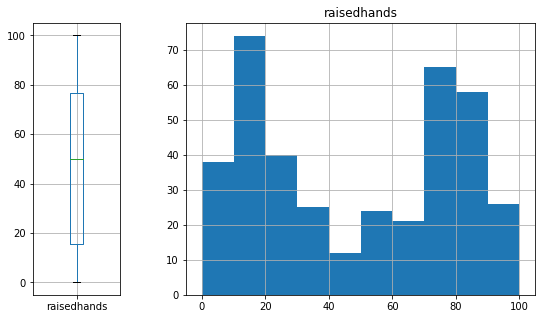

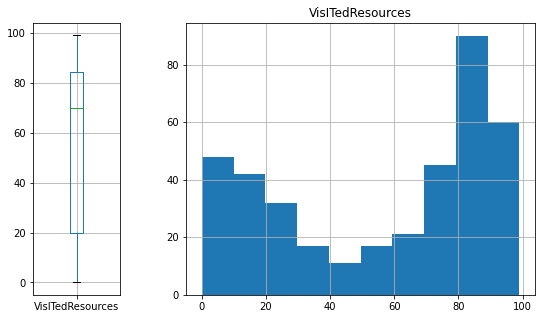

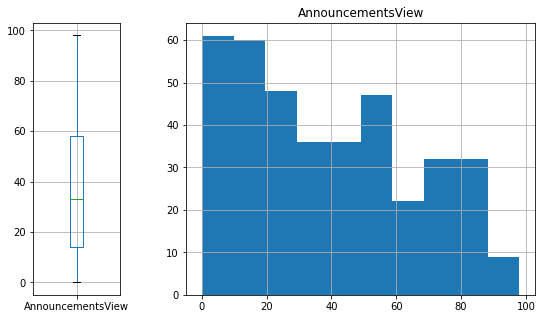

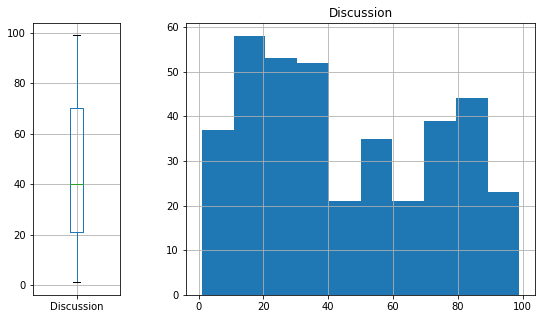

In [123]:
# plotting box plots for all the numeric data to check outliers
total_num_cols = len(train_numeric.columns)
for col in train_numeric.columns:
    fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
    train.boxplot(column=col,ax=axes[0]);
    train.hist(column=col, ax=axes[1]);

#### Why 1.5 IQR only
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1024px-Boxplot_vs_PDF.svg.png" alt="nice_image_from_wikipedia" width="450"/>

https://math.stackexchange.com/questions/966331/why-john-tukey-set-1-5-iqr-to-detect-outliers-instead-of-1-or-2

#### Identified outlier from the box plot and removing it

In [124]:
Q1 = train['Discussion'].quantile(0.25)
Q3 = train['Discussion'].quantile(0.75)
IQR = Q3 - Q1
Q1, Q3, IQR

(21.0, 70.0, 49.0)

In [125]:
# sum of outliers above and below
small_outliers = train['Discussion'] < (Q1 - 1.5 * IQR)
big_outliers = train['Discussion'] > (Q3 + 1.5 * IQR)
sum(small_outliers), sum(big_outliers)

(0, 0)

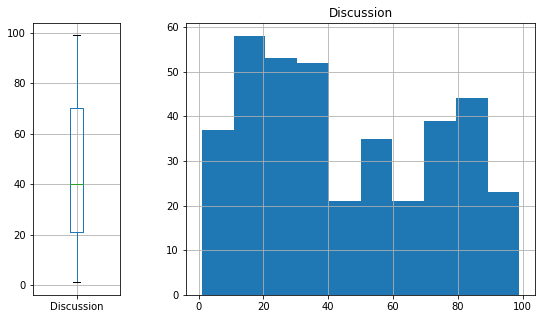

In [126]:
# removing outlier from train, and plotting again to check
train = train[~(small_outliers | big_outliers)]

fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
train.boxplot(column='Discussion',ax=axes[0]);
train.hist(column='Discussion', ax=axes[1]);

### Model Based 

There are multiple algorithams to detect outliers, density based, tree based and others
1. Local Outlier Factor
2. One-Class SVM
3. https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

Although for us a simple box plot gave the desired result

### Final box plots

<AxesSubplot:>

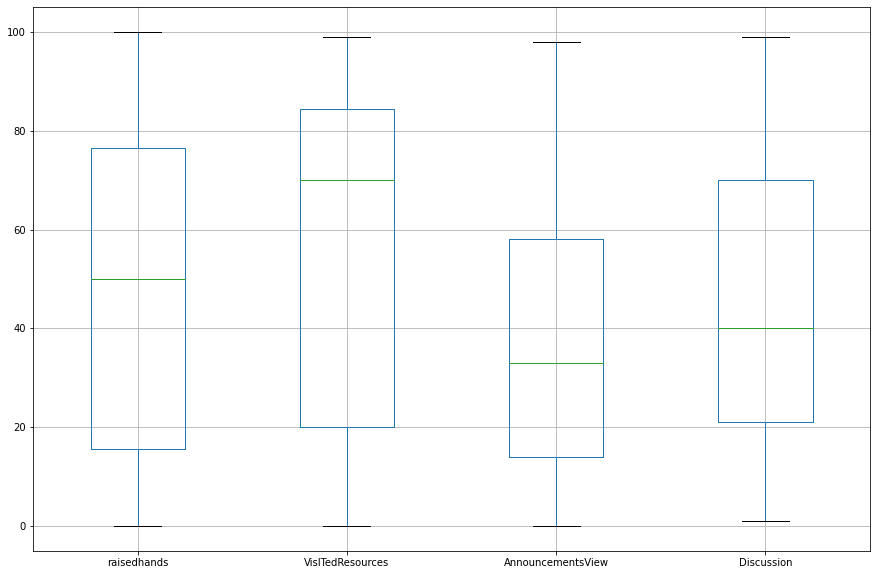

In [127]:
train[train_numeric.columns].boxplot(figsize=(15,10))

## 7 Feature Engineering

In [128]:
train

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
422,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Mum,70.0,69.0,46.0,45.0,Yes,Good,Above-7,M
25,M,KW,KuwaIT,MiddleSchool,G-07,A,IT,F,Father,8.0,7.0,30.0,40.0,Yes,Good,Above-7,L
53,F,KW,KuwaIT,HighSchool,G-11,A,Science,F,Mum,49.0,70.0,19.0,75.0,Yes,Good,Under-7,H
462,M,Iraq,Iraq,MiddleSchool,G-08,A,History,F,Father,72.0,87.0,72.0,89.0,Yes,Good,Above-7,M
101,F,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Mum,70.0,92.0,50.0,7.0,Yes,Good,Under-7,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,M,Palestine,Jordan,MiddleSchool,G-07,B,Biology,F,Father,88.0,90.0,76.0,81.0,Yes,Good,Under-7,H
304,F,Jordan,Jordan,lowerlevel,G-04,B,Science,F,Father,15.0,50.0,24.0,43.0,Yes,Bad,Under-7,M
107,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,70.0,90.0,41.0,33.0,Yes,Bad,Under-7,H
33,M,KW,KuwaIT,lowerlevel,G-05,A,English,F,Father,8.0,22.0,9.0,40.0,No,Bad,Above-7,L


#### Don't think we can make a new feature

## 9. Perform necessary transformation 
1. If the data is not normally distributed and highly skewed it is alwas better to transform the data in normal distribution as the most/all of the asumptions for deriving the methods are that they are normally distributed,
2. Although for classifications naive bayes assume normal distribution we don't have that assumpution for all (need to check)
3. https://anshikaaxena.medium.com/how-skewed-data-can-skrew-your-linear-regression-model-accuracy-and-transfromation-can-help-62c6d3fe4c53
 

array([[<AxesSubplot:title={'center':'raisedhands'}>,
        <AxesSubplot:title={'center':'VisITedResources'}>],
       [<AxesSubplot:title={'center':'AnnouncementsView'}>,
        <AxesSubplot:title={'center':'Discussion'}>]], dtype=object)

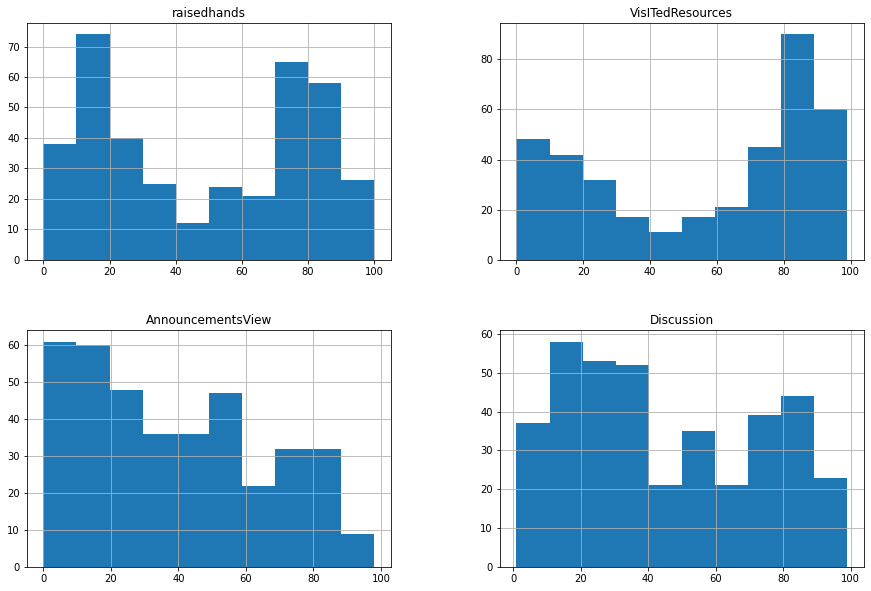

In [129]:
# check data distribution
train[train_numeric.columns].hist(figsize=(15,10))

#### No data seems skewed, We can move forward
1. to handle skewness
2. https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45

In [130]:
# if skewed apply transformations , log, sqrt, box-cot etc.
# train.AnnouncementsView.apply(np.log10)

In [131]:
train.to_csv('Data/transformed/processed_miss_outlier.csv',index=False)

## 10. Bining

1. qcut will calculate the size of each bin in order to make sure the distribution of data in the bins is equal, q cut works using quartile, the number of values in each bin will be equal
2. cut will divide the data in different bins based on the values, no gurantees to be in same bin



#### WHY to convert numeric into categories and should we convert all to categorical data ?

in many cases, premature discretization of continuous variables is undesirable. Doing so throws away potentially meaningful data, and the result can be highly dependent on exactly how you bucket the continuous variables, which is usually done rather arbitrarily. Bucketing people by age decade, for example, implies that there is more similarity between a 50-year-old and a 59-year-old than there is between a 59-year-old and a 60-year-old. There can be some advantages in statistical power to doing this, but if your binning doesn't reflect natural cutpoints in the data, you may just be throwing away valuable information.
https://datascience.stackexchange.com/questions/54244/purpose-of-converting-continuous-data-to-categorical-data

In [132]:
train[train_numeric.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
raisedhands,383.0,47.088251,31.056814,0.0,15.5,50.0,76.5,100.0
VisITedResources,383.0,55.409922,33.136819,0.0,20.0,70.0,84.5,99.0
AnnouncementsView,383.0,38.026110,26.758653,0.0,14.0,33.0,58.0,98.0
Discussion,383.0,44.712794,27.418437,1.0,21.0,40.0,70.0,99.0


In [133]:
# streghty
# uniform’: All bins in each feature have identical widths.
# ‘quantile’: All bins in each feature have the same number of points.
# ‘kmeans’: Values in each bin have the same nearest center of a 1D k-means cluster.
def make_bins(train,stg='uniform'):
    est = preprocessing.KBinsDiscretizer(n_bins=10, encode='ordinal', 
                       strategy=stg)
    est.fit(train)
    est_trasnformed = est.fit_transform(train)

    est_trasnformed_df = pd.DataFrame(est_trasnformed, columns = [col+'_cut' for col in train.columns])
    est_trasnformed_df = est_trasnformed_df.astype('str')
    est_trasnformed_df = est_trasnformed_df.set_index(train.index)
    return est_trasnformed_df, est

In [134]:
train_bin_transformed,bin_enc = make_bins(train_numeric,stg='uniform')
save_pkl_model('Data/processing_models/bin_converter.pkl',bin_enc)
train_bin_transformed

,raisedhands_cut,VisITedResources_cut,AnnouncementsView_cut,Discussion_cut
422,7.0,6.0,4.0,4.0
25,0.0,0.0,3.0,3.0
53,4.0,7.0,1.0,7.0
462,7.0,8.0,7.0,8.0
101,7.0,9.0,5.0,0.0
...,...,...,...,...
418,8.0,9.0,7.0,8.0
304,1.0,5.0,2.0,4.0
107,7.0,9.0,4.0,3.0
33,0.0,2.0,0.0,3.0


In [135]:
train_num_bin = train_bin_transformed

In [136]:
# train_bin_transformed.raisedhands_cut.value_counts().sort_index()

In [137]:
# # analysis
# train_bin_transformed.raisedhands_cut.value_counts().sort_index().plot.bar(figsize=(8,8));
# Class_on_handrs = pd.crosstab(train.Class, train_bin_transformed.raisedhands_cut)
# Class_on_handrs
# sn.heatmap(Class_on_handrs, annot=True, fmt="d", cmap='coolwarm')

In [138]:
# Class_on_handrs.T.plot.bar(stacked=True, figsize=(8,8)); 

In [139]:
# # interactive histogram for deciding bins, not working currently
# # https://towardsdatascience.com/how-to-quickly-find-the-best-bin-width-for-your-histogram-4d8532f053b0

# import plotly.io as pio
# import plotly.graph_objs as go
# import ipywidgets as widgets

# pio.renderers.default = "notebook"

# def rebinnable_interactive_histogram(series, initial_bin_width=10):
#     figure_widget = go.FigureWidget(
#         data=[go.Histogram(x=series, xbins={"size": initial_bin_width})]
#     )

#     bin_slider = widgets.FloatSlider(
#         value=initial_bin_width,
#         min=1,
#         max=30,
#         step=1,
#         description="Bin width:",
#         readout_format=".0f",  # display as integer
#     )

#     histogram_object = figure_widget.data[0]

#     def set_bin_size(change):
#         histogram_object.xbins = {"size": change["new"]}

#     bin_slider.observe(set_bin_size, names="value")

#     output_widget = widgets.VBox([figure_widget, bin_slider])
#     return output_widget

# rebinnable_interactive_histogram(train.raisedhands, 10)

In [140]:
# raised_hands_cut = pd.cut(train.raisedhands,bins=10)
# raised_hands_cut

In [141]:
# streghty
# uniform’: All bins in each feature have identical widths.
# ‘quantile’: All bins in each feature have the same number of points.
# ‘kmeans’: Values in each bin have the same nearest center of a 1D k-means cluster.

# est = preprocessing.KBinsDiscretizer(n_bins=10, encode='ordinal', 
#                        strategy='kmeans')
# est.fit(train_numeric)
# est.fit_transform(train_numeric)

In [142]:
# # cut based on the equal width, saving as type string and cross relation with predicted variable
# raised_hands_cut = pd.cut(train_numeric,bins=10)
# raised_hands_cut
# train['raised_hands_cut'] = raised_hands_cut.astype('str')
# train.raised_hands_cut.value_counts().sort_index()

In [143]:
# train.raised_hands_cut.value_counts().sort_index().plot.bar(figsize=(8,8));
# Class_on_handrs = pd.crosstab(train.Class, train.raised_hands_cut)
# Class_on_handrs
# sn.heatmap(Class_on_handrs, annot=True, fmt="d", cmap='coolwarm')

In [144]:
# Class_on_handrs.T.plot.bar(stacked=True, figsize=(8,8)); 
# students who asks less questions are at low ranking 

In [145]:
# # we can specify the intervals by our selves as well
# pd.interval_range(start=0, end=100,freq=10)
# raised_hands_cut = pd.cut(train.raisedhands,
#        bins=pd.interval_range(start=0, end=111,freq=11))

In [146]:
# train.head()

## One hot encoding

1. Here we can use Pd.dummies() but it can not handle unknown categories. we may modify it
2. but the better option is sklearn One hot encoder, where we can ignore new category and set that encoded as null

handle_unknown{‘error’, ‘ignore’}, default=’error’
Whether to raise an error or ignore if an unknown categorical feature is present during transform (default is to raise). When this parameter is set to ‘ignore’ and an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.


In [147]:
# pd.get_dummies(train['NationalITy'], prefix='NationalITy').head()

In [152]:
def ohe_converter(train):
    #ignore tells the encoder to ignore new categories by encoding them with 0's
    # dropping first to avoide collinerity
    ohe = OneHotEncoder(handle_unknown = 'ignore',drop='first') 
    encoded_vec = ohe.fit(train)
    ohe_transformed = encoded_vec.transform(train).toarray()
    encoded_df = pd.DataFrame(ohe_transformed,columns=ohe.get_feature_names_out())
    encoded_df = encoded_df.set_index(train.index)
    return encoded_df,ohe

In [153]:
train_categoric = train.select_dtypes(include="O")
# train_categoric.columns
train_categoric

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
422,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Mum,Yes,Good,Above-7,M
25,M,KW,KuwaIT,MiddleSchool,G-07,A,IT,F,Father,Yes,Good,Above-7,L
53,F,KW,KuwaIT,HighSchool,G-11,A,Science,F,Mum,Yes,Good,Under-7,H
462,M,Iraq,Iraq,MiddleSchool,G-08,A,History,F,Father,Yes,Good,Above-7,M
101,F,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Mum,Yes,Good,Under-7,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,M,Palestine,Jordan,MiddleSchool,G-07,B,Biology,F,Father,Yes,Good,Under-7,H
304,F,Jordan,Jordan,lowerlevel,G-04,B,Science,F,Father,Yes,Bad,Under-7,M
107,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,Yes,Bad,Under-7,H
33,M,KW,KuwaIT,lowerlevel,G-05,A,English,F,Father,No,Bad,Above-7,L


In [154]:
train_cat_ohe, ohe = ohe_converter(train_categoric.iloc[:,:-1])
save_pkl_model('Data/processing_models/ohe_converter.pkl',ohe)
train_cat_ohe

,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,NationalITy_SaudiArabia,NationalITy_Syria,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
422,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
25,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
53,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
462,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
101,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
304,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
107,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
33,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [260]:
# pd.concat([train[train_numeric.columns],encoded_df],axis=1)

In [156]:
train_ohe_bin = pd.concat([train_num_bin,train_cat_ohe,train['Class']],axis=1)
train_ohe_bin

,raisedhands_cut,VisITedResources_cut,AnnouncementsView_cut,Discussion_cut,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7,Class
422,7.0,6.0,4.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,M
25,0.0,0.0,3.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,L
53,4.0,7.0,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,H
462,7.0,8.0,7.0,8.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,M
101,7.0,9.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,8.0,9.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,H
304,1.0,5.0,2.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,M
107,7.0,9.0,4.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,H
33,0.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,L


In [160]:
train_ohe_bin.to_csv('Data/transformed/train_bin_ohe.csv',index=False)

In [162]:
# ohe = OneHotEncoder(handle_unknown = 'ignore') #ignore tells the encoder to ignore new categories by encoding them with 0's

In [163]:
# train_categoric = train.select_dtypes(include="O")
# train_categoric.columns

In [164]:
# encoded_vec = ohe.fit_transform(train_categoric).toarray()
# encoded_vec

In [165]:
# encoded_df = pd.DataFrame(encoded_vec,columns=ohe.get_feature_names_out())
# encoded_df.head()

In [166]:
# encoded_df = encoded_df.set_index(train.index)
# encoded_df.head()

## Scaling


The most comon transformations for normalizing the data are: 
* Standarization: $\frac{X - \mu}{\sigma}$ will trasnform your data so it has mean 0 and std 1.
* Min-max scaling: $\frac{X - X_{min}}{X_{max} - X_{min}}$ will send your data to the range [0,1]
* Boxcox transformation: $\frac{X^\lambda - 1}{ \lambda}$ if $\lambda \neq 0$ or $ln(X)$ if $\lambda = 0$ transforms the data to try to fit a normal distribution. 

**Why Normally distributed**

1. In Machine Learning, data satisfying Normal Distribution is beneficial for model building. It makes math easier. Models like LDA, Gaussian Naive Bayes, Logistic Regression, Linear Regression, etc., are explicitly calculated from the assumption that the distribution is a bivariate or multivariate normal. Also, Sigmoid functions work most naturally with normally distributed data.
2. Normality is an assumption for the ML models. It is not mandatory that data should always follow normality. ML models work very well in the case of non-normally distributed data also. Models like decision tree, XgBoost, don’t assume any normality and work on raw data as well. Also, linear regression is statistically effective if only the model errors are Gaussian, not exactly the entire dataset.

In [174]:
# datafreame subset, single or multi columns
def scalling(train, type='ss'):
    if type=='ss':
        std_scaler = preprocessing.StandardScaler()
        std_scaler.fit(train)
        train_transform = std_scaler.transform(train)
        df_train_transform = pd.DataFrame(train_transform,columns = train.columns)
        df_train_transform = df_train_transform.set_index(train.index)
        return std_scaler,df_train_transform
    if type=='mms':
        mms_scaler = preprocessing.MinMaxScaler()
        mms_scaler.fit(train)
        train_transform = mms_scaler.transform(train)
        df_train_transform = pd.DataFrame(train_transform,columns = train.columns)
        df_train_transform = df_train_transform.set_index(train.index)
        return mms_scaler,df_train_transform
    if type=='bx':
        pt = preprocessing.PowerTransformer(method='box-cox')
        train_nonzero = train.replace(0,0.000001)
        pt.fit(train_nonzero)
        train_transform = pt.transform(train_nonzero)
        df_train_transform = pd.DataFrame(train_transform,columns = train.columns)
        df_train_transform = df_train_transform.set_index(train.index)
        return pt, df_train_transform

In [175]:
scaler, transformed_dt  = scalling(train.select_dtypes(include="number"),'ss')

In [176]:
save_pkl_model('Data/processing_models/ss_converter.pkl',scaler)

In [177]:
train_scale_ohe = pd.concat([transformed_dt,train_cat_ohe,train['Class']],axis=1)
train_scale_ohe

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7,Class
422,0.738702,0.410657,0.298383,0.010489,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,M
25,-1.260251,-1.462821,-0.300337,-0.172109,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,L
53,0.061637,0.440874,-0.711956,1.106074,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,H
462,0.803184,0.954570,1.271302,1.617347,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,M
101,0.738702,1.105657,0.448063,-1.377253,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1.319043,1.045222,1.420982,1.325191,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,H
304,-1.034563,-0.163474,-0.524857,-0.062550,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,M
107,0.738702,1.045222,0.111283,-0.427746,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,H
33,-1.260251,-1.009560,-1.086156,-0.172109,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,L


In [179]:
train_scale_ohe.to_csv('Data/transformed/train_scale_ohe.csv',index=False)

In [180]:
# min_max_scaler =  preprocessing.MinMaxScaler()
# train_numeric_min_max = min_max_scaler.fit_transform(train_numeric)
# train_numeric_min_max


# std_scaler = preprocessing.StandardScaler()
# train_numeric_std= preprocessing.scale(train_numeric)
# train_numeric_std

# train_numeric_bx, fitted_lambda_bx = boxcox(train_numeric.raisedhands.replace(0,0.001))
# train_numeric_bx

# # using scipy for all columns
# train_numeric_bx = np.zeros(train_numeric.shape)
# for i,col in enumerate(train_numeric.columns):
#     bx_temp, fitted_lambda_bx = boxcox(train_numeric[col].replace(0,0.000001))
#     train_numeric_bx[:,i] = bx_temp
#     print(fitted_lambda_bx)

## Saving the Data

Save the preprocessed data into a file for future use
<div class="alert alert-block alert-warning">
Pandas allows to save the data in a lot of different formats as you can see [here](http://pandas-docs.github.io/pandas-docs-travis/io.html) among others CSV, pickle, HDF5, JSON, Excel as well as other data storages like SQL databases, Google Big Query, parquet or feather.

The simplest way is to save the data as a csv with `to_csv` or as a pickle file (native python store format) with `to_pickle`, this last one allows also to compress the data.
</div>


In [189]:
np.random.seed(0)
train_save = train.sample(frac=1).reset_index(drop=True)

In [190]:
train_save

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,raised_hands_cut
0,F,lebanon,lebanon,MiddleSchool,G-08,A,Arabic,S,Father,25.0,15,32,53,No,Bad,Under-7,M,"(20.0, 30.0]"
1,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Mum,70.0,82,75,29,Yes,Good,Under-7,M,"(60.0, 70.0]"
2,F,Jordan,Palestine,lowerlevel,G-02,A,French,F,Mum,80.0,77,63,83,Yes,Good,Under-7,M,"(70.0, 80.0]"
3,F,Palestine,Jordan,lowerlevel,G-02,A,Arabic,F,Mum,98.0,88,60,31,No,Good,Under-7,H,"(90.0, 100.0]"
4,M,Syria,Syria,lowerlevel,G-02,A,French,S,Father,27.0,20,33,35,No,Bad,Under-7,M,"(20.0, 30.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,F,Jordan,Jordan,lowerlevel,G-02,B,French,S,Father,50.0,62,73,43,Yes,Bad,Above-7,M,"(40.0, 50.0]"
374,F,KW,KuwaIT,lowerlevel,G-02,C,IT,F,Mum,77.0,80,12,19,Yes,Good,Above-7,M,"(70.0, 80.0]"
375,F,KW,USA,HighSchool,G-11,A,Quran,F,Mum,60.0,80,50,40,No,Bad,Under-7,M,"(50.0, 60.0]"
376,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Mum,89.0,96,45,92,Yes,Good,Under-7,H,"(80.0, 90.0]"


### To save in pickle

In [196]:
# to save in pickle with compression
save_path = 'Data/transformed/processed_basic.pkl.bz2'
train_save.to_pickle(save_path,compression='bz2')

In [197]:
# to load and check
# train_save =pd.read_pickle('Data/transformed/processed_basic.pkl.bz2',compression='bz2')
# train_save.head()

### To save in csv

In [198]:
save_path = 'Data/transformed/processed_basic.csv'
train_save.to_csv(save_path,index=False)

In [199]:
# train_save = pd.read_csv(save_path)
# train_save.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,raised_hands_cut
0,F,lebanon,lebanon,MiddleSchool,G-08,A,Arabic,S,Father,25.0,15,32,53,No,Bad,Under-7,M,"(20.0, 30.0]"
1,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Mum,70.0,82,75,29,Yes,Good,Under-7,M,"(60.0, 70.0]"
2,F,Jordan,Palestine,lowerlevel,G-02,A,French,F,Mum,80.0,77,63,83,Yes,Good,Under-7,M,"(70.0, 80.0]"
3,F,Palestine,Jordan,lowerlevel,G-02,A,Arabic,F,Mum,98.0,88,60,31,No,Good,Under-7,H,"(90.0, 100.0]"
4,M,Syria,Syria,lowerlevel,G-02,A,French,S,Father,27.0,20,33,35,No,Bad,Under-7,M,"(20.0, 30.0]"
